In [61]:
from IPython.core.display import HTML
css_file = '../../msc/custom.css' 
HTML(open(css_file, 'r').read()) 

# Object Oriented Programming



In [62]:
from development import AgentCls, EconomyCls
import numpy as np

# Plotting 
import matplotlib.pyplot as plt
%pylab inline --no-import-all


Populating the interactive namespace from numpy and matplotlib


In [63]:
# Set Parameters
NUM_AGENTS = 1000

ENDOWMENT = 10.0

ALPHA = 0.75

P1 = 0.1
NUM_POINTS = 25
# Auxiliary
price_grid = np.linspace(P1, 1.0, num=NUM_POINTS)

# Simulate agent populations of different types
agent_objs = dict()

for type_ in ['random', 'rational']:
    
    agent_objs[type_] = []
    
    for _ in range(NUM_AGENTS):

        agent_obj = AgentCls()

        agent_obj.set_type(type_)

        agent_obj.set_preference_parameter(ALPHA)

        agent_obj.set_endowment(ENDOWMENT)

        agent_objs[type_] += [agent_obj]

# Get market demands
market_demands = dict()

for type_ in ['random', 'rational']:
    
    market_demands[type_] = []
    
    # Initialze economy with agent of particular
    # types
    economy_obj = EconomyCls(agent_objs[type_])

    for p2 in price_grid:

        # Construct market demand for second good
        market_demands[type_] += [economy_obj.get_aggregate_demand(P1, p2)[1]/float(len(agent_objs))]




Let us compare the demands for an individual agent. Of course, in the rational case all agents have exactly the same demand.

In [64]:
# Draw a random agent from the population
idx = np.random.random_integers(0, NUM_AGENTS - 1)

agent_ration = agent_objs['rational'][idx]
agent_random = agent_objs['random'][idx]

individual_demands = {}

for type_ in ['rational', 'random']:
    
    # Initialize container for results
    individual_demands[type_] = []
    
    # Select the relevant agent type
    if type_ == 'rational':
        agent_obj = agent_ration
    elif type_ == 'random':
        agent_obj = agent_random
    
    # Obtain individual demands as we vary the price
    # of good 2.
    for p2 in price_grid:

        agent_obj.choose(P1, p2)
        
        individual_demands[type_] += [agent_obj.get_individual_demand()[1]]


Let us visiualize the different individual demands as we increase the price of good 2.

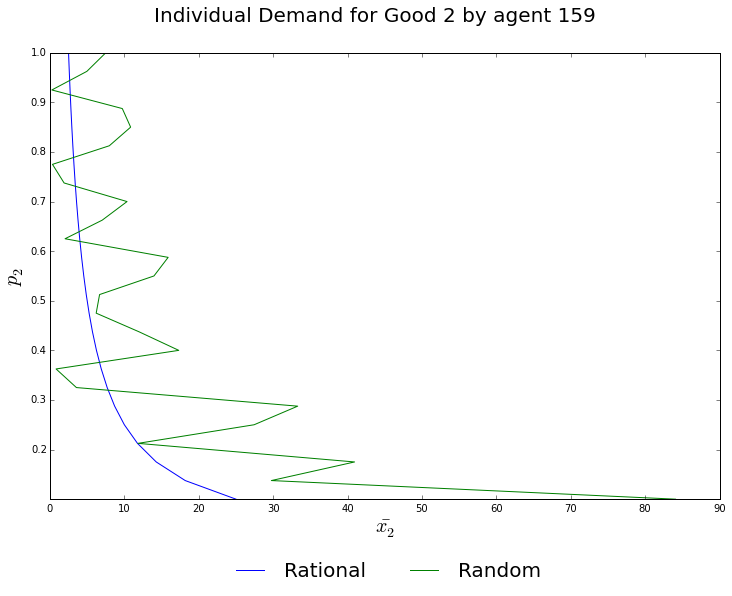

In [65]:
# Initialize canvas
ax = plt.figure(figsize=(12,8)).add_subplot(111)

# Plot demands by population types
ax.plot(individual_demands['rational'], price_grid, label='Rational')
ax.plot(individual_demands['random'], price_grid, label='Random')

# Set title and axis labels
plt.suptitle('Individual Demand for Good 2 by agent ' + str(idx), fontsize=20)
ax.set_xlabel(r'$\bar{x_2}$', fontsize=20)
ax.set_ylabel(r'$p_2$', fontsize=20)

# Set up legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
    fancybox=False, frameon=False, shadow=False, ncol=2, fontsize=20)

# Remove first element on y-axis
ax.yaxis.get_major_ticks()[0].set_visible(False)
plt.show()

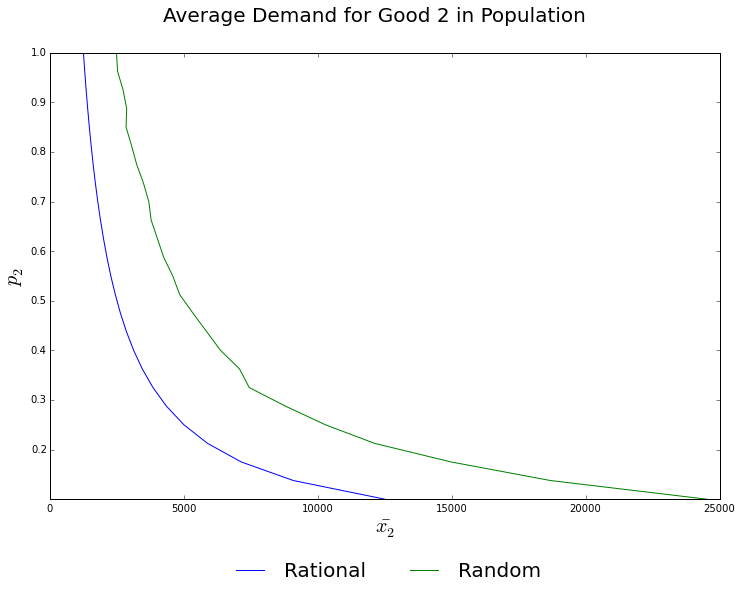

In [66]:
# Initialize canvas
ax = plt.figure(figsize=(12,8)).add_subplot(111)

# Plot execution times by implementations
ax.plot(market_demands['rational'], price_grid, label='Rational')
ax.plot(market_demands['random'], price_grid, label='Random')

# Set title and axis labels
plt.suptitle('Average Demand for Good 2 in Population', fontsize=20)
ax.set_xlabel(r'$\bar{x_2}$', fontsize=20)
ax.set_ylabel(r'$p_2$', fontsize=20)

# Set up legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
    fancybox=False, frameon=False, shadow=False, ncol=2, fontsize=20)

# Remove first element on y-axis
ax.yaxis.get_major_ticks()[0].set_visible(False)
plt.show()